In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import cmocean
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
grid36 = grid_read(36)
grid18 = grid_read(18)
grid9  = grid_read(9)

In [106]:
!ncdump -h /scratch/general/am8e13/CORE_runs/GOLD/ocean.200701-200712.salt.nc

ncdump: /usr/lib64/libjpeg.so.62: no version information available (required by ncdump)
*** ncdump: ncopen failed on /scratch/general/am8e13/CORE_runs/GOLD/ocean.200701-200712.salt.nc


In [160]:
file2read = netcdf.NetCDFFile('/scratch/general/am8e13/CORE_runs/FESOM/loop_5_last_year_task_2.nc','r')
print file2read.variables

{'lats': <scipy.io.netcdf.netcdf_variable object at 0x2b246d7da110>, 'pot_temp': <scipy.io.netcdf.netcdf_variable object at 0x2b246d7da950>, 'age': <scipy.io.netcdf.netcdf_variable object at 0x2b246d7da3d0>, 'month': <scipy.io.netcdf.netcdf_variable object at 0x2b246d7da6d0>, 'deps': <scipy.io.netcdf.netcdf_variable object at 0x2b246d7da710>, 'lons': <scipy.io.netcdf.netcdf_variable object at 0x2b246d7da1d0>, 'salt': <scipy.io.netcdf.netcdf_variable object at 0x2b246d7da550>}


In [145]:
FSU_d = {'mod' : 'FSU' , 'temp_f' : "711_archm.2007_mon_3dt.nc" , 'salt_f'  : "711_archm.2007_mon_3ds.nc" ,\
       'depth' : 'Layer' , 'temp' : 'layer_temperature' , 'salt' : 'layer_salinity' , \
       'lat' : 'Latitude' , 'lon' : 'Longitude'}
GEOMAR_d = {'mod' : 'GEOMAR' , 'temp_f' : "ORCA05-K3186_1m_20070101_20071231_grid_T.nc" ,\
            'salt_f'  : "ORCA05-K3186_1m_20070101_20071231_grid_T.nc" ,\
       'depth' : 'deptht' , 'temp' : 'votemper' , 'salt' : 'vosaline' , \
       'lat' : 'nav_lat' , 'lon' : 'nav_lon'}
MRI_d = {'mod' : 'MRI' , 'temp_f' : "temp_yr1300.nc" , 'salt_f'  : "saln_yr1300.nc" ,\
       'depth' : 'level' , 'temp' : 'temp' , 'salt' : 'saln' , \
       'lat' : 'latitude' , 'lon' : 'longitude'}
ORCA1_d = {'mod' : 'GEOMAR' , 'temp_f' : "ORCA05-K3186_1m_20070101_20071231_grid_T.nc" ,\
            'salt_f'  : "ORCA05-K3186_1m_20070101_20071231_grid_T.nc" ,\
       'depth' : 'deptht' , 'temp' : 'votemper' , 'salt' : 'vosaline' , \
       'lat' : 'nav_lat' , 'lon' : 'nav_lon'}
NCAR_d = {'mod' : 'NCAR' , 'temp_f' : "g40.000.pop.h.0300.nc" ,\
            'salt_f'  : "g40.000.pop.h.0300.nc" ,\
       'depth' : 'z_t' , 'temp' : 'TEMP' , 'salt' : 'SALT' , \
       'lat' : 'TLAT' , 'lon' : 'TLONG'}
GOLD_d =  {'mod' : 'GOLD' , 'temp_f' : "ocean.200701-200712.temp.nc" ,\
            'salt_f'  : "ocean.200701-200712.salt.nc" ,\
       'depth' : 'geolat' , 'temp' : 'temp' , 'salt' : 'salt' , \
       'lat' : 'geolat' , 'lon' : 'geolon'}
MOM_d =  {'mod' : 'MOM' , 'temp_f' : "ocean.200701-200712.temp.nc" ,\
            'salt_f'  : "ocean.200701-200712.salt.nc" ,\
       'depth' : 'geolat_c' , 'temp' : 'temp' , 'salt' : 'salt' , \
       'lat' : 'geolat_c' , 'lon' : 'geolon_c'}
FESOM = {'mod' : 'FESOM' , 'temp_f' : "loop_5_last_year_task_2.nc" ,\
            'salt_f'  : "loop_5_last_year_task_2.nc" ,\
       'depth' : 'geolat_c' , 'temp' : 'temp' , 'salt' : 'salt' , \
       'lat' : 'geolat_c' , 'lon' : 'geolon_c'}

In [147]:
NCAR = read_model()
NCAR.read(NCAR_d)

MRI = read_model()
MRI.read(MRI_d)

FSU = read_model()
FSU.read(FSU_d)

GEOMAR = read_model()
GEOMAR.read(GEOMAR_d)

GOLD = read_model()
GOLD.read(GOLD_d)

MOM = read_model()
MOM.read(MOM_d)

Read NCAR
Read MRI
Read FSU
Read GEOMAR
Read GOLD


In [162]:
GOLD.interp()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

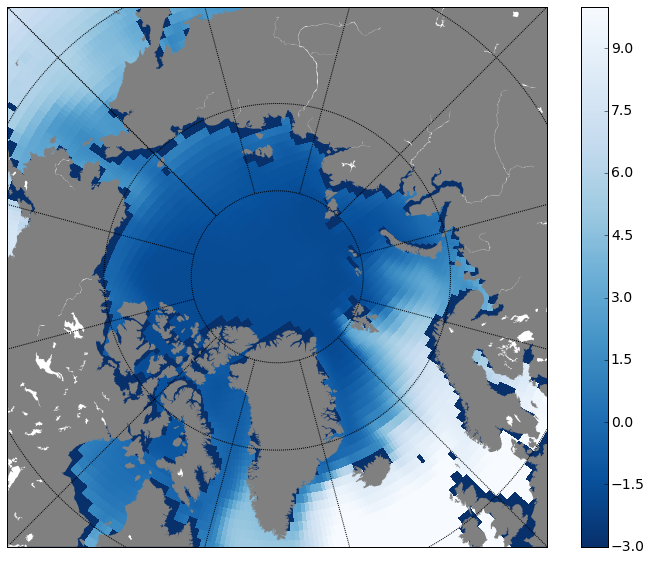

In [149]:
def tempbasemap(model):
    lat_ts=90.0
    lat_0=90.0
    lon_0=-45.0
    sgn=1
    width=7000000.
    height=7000000.0
    fig,ax = plt.subplots(1,1)
    m = Basemap(ax=ax,width=width,height=height,resolution='l',\
            projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
    # the continents will be drawn on top.
    m.drawmapboundary(fill_color='white')
    # fill continents, set lake color same as ocean color.
    m.fillcontinents(color='grey',lake_color='white')
    #grid1 = np.meshgrid(INMON.lon,INMON.lat)
    x,y = m(model.lon,model.lat,)
    datam = model.T[0,:,:]
    sitm = np.ma.masked_where(datam>100,datam)
    CS=m.pcolormesh(x,y,sitm,cmap=matplotlib.cm.Blues_r,vmin=-3,vmax=10)
    m.drawparallels(np.arange(-80.,81.,15.))
    m.drawmeridians(np.arange(-180.,181.,30.))
    plt.colorbar(CS)
    #axes.flat[ind].set_title(data_comp[data].title,fontsize=16)
    fig.subplots_adjust(right=1.7,top=2.)
tempbasemap(MOM)

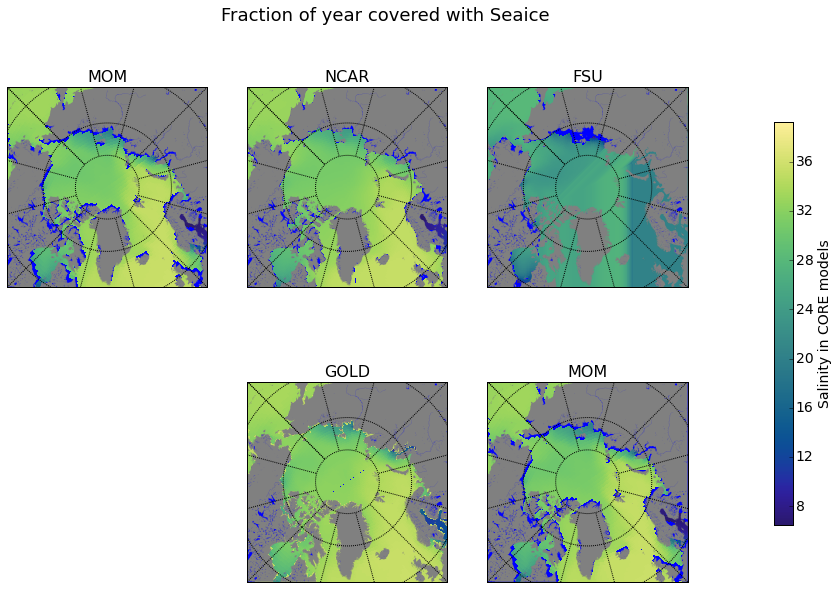

In [159]:
comp_seaice = { 0: FESOM , 1 : NCAR , 2 : FSU , 3 : GEOMAR , 4 : GOLD , 5 : MOM}
def basemap_seaice(data_comp):
    lat_ts=90.0
    lat_0=90.0
    lon_0=-45.0
    sgn=1
    width=7000000.
    height=7000000.0
    
    vmin = 24
    vmax = 36
    
    ind = 0
    fig, axes = plt.subplots(2,3)
    for data in data_comp:
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='h',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='blue')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='blue')
        x,y=m(data_comp[data].lon,data_comp[data].lat)
        datam = data_comp[data].S[0,:,:]
        sitm = np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolormesh(x,y,sitm,cmap=cmocean.cm.salinity)
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        axes.flat[ind].set_title(data_comp[data].title,fontsize=16)
        ind += 1
    fig.suptitle("Fraction of year covered with Seaice",x=1.,y=2.2,fontsize=18)
    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'Salinity in CORE models')
    fig.subplots_adjust(right=1.7,top=2.)
    #fig.savefig('/noc/users/am8e13/Figures/basemap_seaice',dpi=dpires, bbox_inches='tight')
basemap_seaice(comp_seaice)

In [186]:
class read_model():
    def __init__(self):
        self.lat = []
        self.lon = []
        self.T = []
        self.S =[]
        self.depth = []
        
    def read(self,model):
        self.title = model['mod']
        path = '/scratch/general/am8e13/CORE_runs/'+model['mod']+'/'
        file2read = netcdf.NetCDFFile(path+model['temp_f'],'r')
        tmp = file2read.variables[model['temp']]
        temp = tmp[:]*1 
        file2read = netcdf.NetCDFFile(path+model['salt_f'],'r')
        tmp = file2read.variables[model['salt']]
        salt = tmp[:]*1
        
        if model.has_key('grid'):
            file2read = netcdf.NetCDFFile(path+model['temp_f'],'r')
            
        tmp = file2read.variables[model['lat']]
        lat = tmp[:]*1
        tmp = file2read.variables[model['lon']]
        lon = tmp[:]*1         
        tmp = file2read.variables[model['depth']]
        lev = tmp[:]*1   
        depth = tmp[:]*1        
        Z = tmp[:]*1      
        T = np.nanmean(temp,axis=0)
        S = np.nanmean(salt,axis=0)
        file2read.close()
        
        self.S = S
        self.S[self.S<0] = np.nan
        self.S[self.S>60] = np.nan
        self.T = T
        self.T[self.T<-20] = np.nan
        self.T[self.T>60] = np.nan
        self.lat = lat
        self.lon = lon
        
        print 'Read '+model['mod']
        
    def interp(self):

        T36 = np.zeros((self.T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        T18 = np.zeros((self.T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        T9 = np.zeros((self.T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
        
        S36 = np.zeros((self.T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        S18 = np.zeros((self.T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        S9 = np.zeros((self.T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
        

        
        m = Basemap(width=width,height=height,resolution='h',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        self.lon,self.lat=m(self.lon,self.lat)
        
        print self.lon.shape, self.lat.shape
        for k in range(0,self.T.shape[0]): 
            T36[k,:,:] = mpl_toolkits.basemap.interp(self.T[k,:,:], self.lon, \
                                self.lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
            S36[k,:,:] = mpl_toolkits.basemap.interp(self.S[k,:,:], self.lon, \
                                self.lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)         
            T18[k,:,:] = mpl_toolkits.basemap.interp(self.T[k,:,:], self.lon, \
                                self.lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
            S18[k,:,:] = mpl_toolkits.basemap.interp(self.S[k,:,:], self.lon, \
                                self.lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
            T9[k,:,:] = mpl_toolkits.basemap.interp(self.T[k,:,:], self.lon, \
                                self.lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)
            S9[k,:,:] = mpl_toolkits.basemap.interp(self.S[k,:,:], self.lon, \
                                self.lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)
        self.T36 = T36
        self.T18 = T18
        self.T9 = T9
        self.S36 = S36
        self.S18 = S18
        self.S9 = S9
        #self.rho36 = rhop(S36,T36)
        #self.rho18 = rhop(S18,T18)
        #self.rho9 = rhop(S9,T9)
        print 'Interp '+model['mod']

In [187]:
GOLD = read_model()
GOLD.read(GOLD_d)
GOLD.interp()

Read GOLD
(210, 360) (210, 360)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<matplotlib.contour.QuadContourSet instance at 0x2b24dc2492d8>

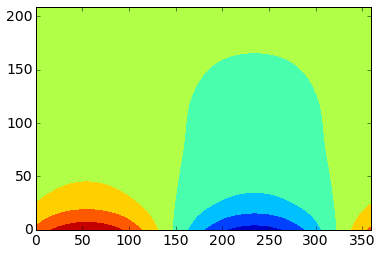

In [190]:
plt.contourf(GOLD.lat)

In [195]:
sys.path.append('/noc/users/am8e13/Python/esmp.ESMF_6_3_0rp1_ESMP_01/')
import ESMP


The ESMFMKFILE cannot be found!


ImportError: 1000

In [200]:
import scipy.spatial

RuntimeError: module compiled against API version a but this version of numpy is 9

ImportError: numpy.core.multiarray failed to import